## Cluster Model

#### Features chosen

**Numerical:**

- GrLivArea
- FirstFlrSF
- YearBuilt
- YearRemodAdd
- GarageYeBuilt

**Categorical**
 
- Utilities=AllPub
- Street=Pave
- Condition2=Norm (Proximity to various conditions)
- RoofMatl=CompShg
- Heating=GasA


In [1]:
!pip install tqdm

In [2]:
cd ..

/home/jovyan/CSX_450_2_Final_Exam


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lib.visuals as vs
from sklearn.decomposition import PCA

In [4]:
run src/load_data.py

In [5]:
np.random.seed(42)

In [6]:
top_10_features_df = numerical_features

one_hot_encoded_features = pd.get_dummies(categorical_features)
top_10_features_df["Utilities_AllPub"] = one_hot_encoded_features.Utilities_AllPub
top_10_features_df["Street_Pave"] = one_hot_encoded_features.Street_Pave
top_10_features_df["Condition2_Norm "] = one_hot_encoded_features.Condition2_Norm
top_10_features_df["RoofMatl_CompShg"] = one_hot_encoded_features.RoofMatl_CompShg
top_10_features_df["Heating_GasA"] = one_hot_encoded_features.Heating_GasA


In [7]:
top_10_features_df.head()

,GrLivArea,FirstFlrSF,YearBuilt,YearRemodAdd,GarageYrBlt,Utilities_AllPub,Street_Pave,Condition2_Norm,RoofMatl_CompShg,Heating_GasA
Id,,,,,,,,,,
1,1710,856,2003,2003,2003.0,1,1,1,1,1
2,1262,1262,1976,1976,1976.0,1,1,1,1,1
3,1786,920,2001,2002,2001.0,1,1,1,1,1
4,1717,961,1915,1970,1998.0,1,1,1,1,1
5,2198,1145,2000,2000,2000.0,1,1,1,1,1


In [8]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float, int])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

In [9]:
df_gelman = apply_scale(top_10_features_df, gelman_scale)
df_standard = apply_scale(top_10_features_df, standard_scale)
df_gelman.head()

Index(['GrLivArea', 'FirstFlrSF', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], dtype='object')
Index(['GrLivArea', 'FirstFlrSF', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], dtype='object')


,GrLivArea,FirstFlrSF,YearBuilt,YearRemodAdd,GarageYrBlt,Utilities_AllPub,Street_Pave,Condition2_Norm,RoofMatl_CompShg,Heating_GasA
Id,,,,,,,,,,
1,0.168847,-0.414880,0.511257,0.429568,0.496033,1,1,1,1,1
2,-0.262636,0.109647,0.051759,-0.230745,-0.050753,1,1,1,1,1
3,0.242045,-0.332196,0.477220,0.405112,0.455530,1,1,1,1,1
4,0.175589,-0.279227,-0.986367,-0.377481,0.394776,1,1,1,1,1
5,0.638854,-0.041510,0.460202,0.356200,0.435279,1,1,1,1,1


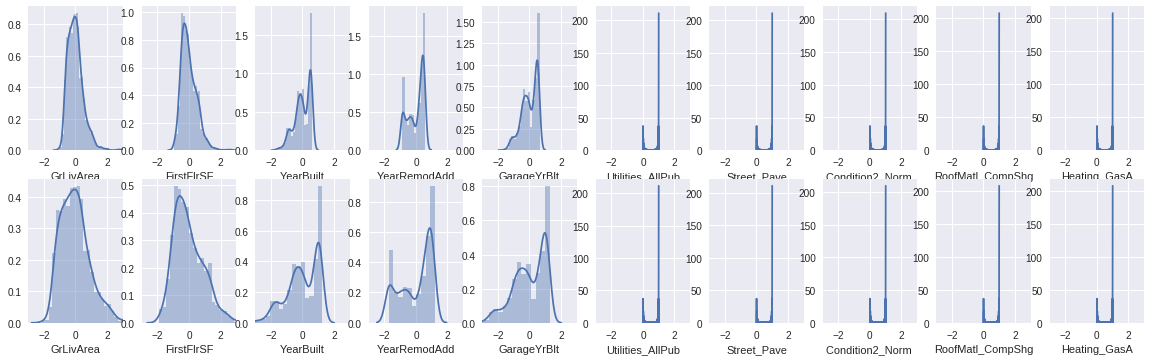

In [10]:
fig = plt.figure(figsize=(20,9))
for i, col in enumerate(top_10_features_df.columns):    
    fig.add_subplot(3,10,1+i)
    sns.distplot(df_gelman[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,10,11+i)
    sns.distplot(df_standard[col])
    plt.xlim(-3,3)

#### We can see from the plots above that Gelman scaling makes the histogram slimmer with the points closer to the mean.

In [11]:
pca_gelman = PCA()
pca_standard = PCA()
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### PCA using Gelman scaling

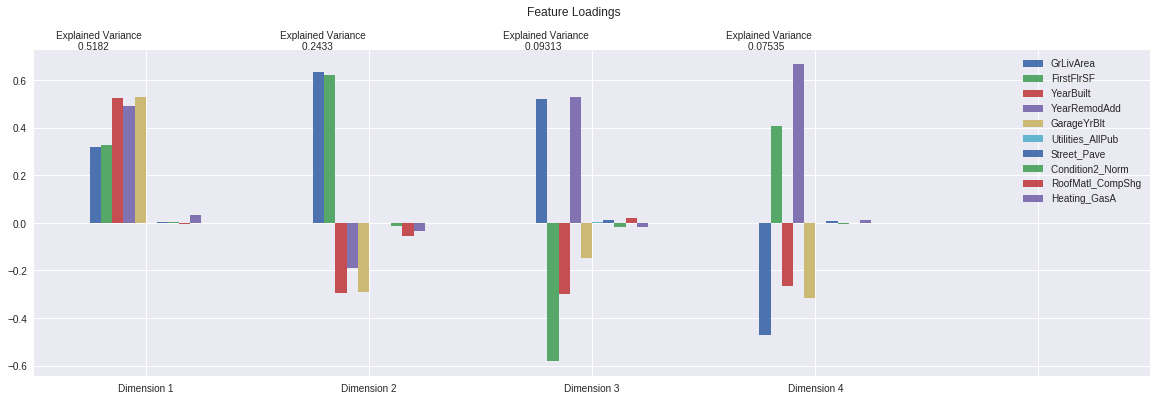

In [12]:
gelman_loading_plot = vs.FeatureLoadingsPlot(df_gelman, pca_gelman,4)
gelman_loading_plot.display_segments()

### PCA using Standard scaling

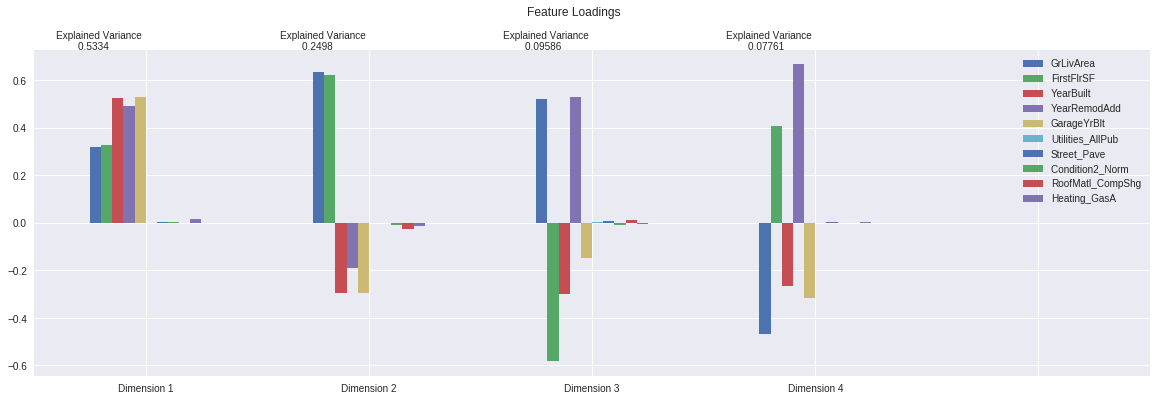

In [13]:
standard_loading_plot = vs.FeatureLoadingsPlot(df_standard, pca_standard,4)
standard_loading_plot.display_segments()

In [14]:
whos PCA

Variable       Type    Data/Info
--------------------------------
pca_gelman     PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_standard   PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)


In [15]:
dims = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4','Dimension 5', 'Dimension 6', 'Dimension 7', 
                    'Dimension 8', 'Dimension 9', 'Dimension 10']
df_gelman_pca = pd.DataFrame(pca_gelman.transform(df_gelman))
df_gelman_pca.columns = dims
df_standard_pca = pd.DataFrame(pca_standard.transform(df_standard))
df_standard_pca.columns = dims

In [16]:
whos DataFrame

Variable                         Type         Data/Info
-------------------------------------------------------
categorical_features             DataFrame         Utilities Street Con<...>\n[1460 rows x 5 columns]
categorical_ouliers_removed_df   DataFrame         Utilities Street Con<...>\n[1447 rows x 5 columns]
df_gelman                        DataFrame          GrLivArea  FirstFlr<...>n[1379 rows x 10 columns]
df_gelman_pca                    DataFrame          Dimension 1  Dimens<...>n[1379 rows x 10 columns]
df_standard                      DataFrame          GrLivArea  FirstFlr<...>n[1379 rows x 10 columns]
df_standard_pca                  DataFrame          Dimension 1  Dimens<...>n[1379 rows x 10 columns]
housing_df                       DataFrame          MSSubClass MSZoning<...>n[1460 rows x 80 columns]
listing_df                       DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_final_df                 DataFrame          GrLivArea  FirstFlr<

### Clustering using PCA with Gelman scaling

 33%|███▎      | 1/3 [00:02<00:04,  2.17s/it]

For n_clusters = 2 the silhouette score is 0.3609767796833212.


 67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

For n_clusters = 3 the silhouette score is 0.28523467671084346.


100%|██████████| 3/3 [00:09<00:00,  3.19s/it]

For n_clusters = 4 the silhouette score is 0.25247126389934926.


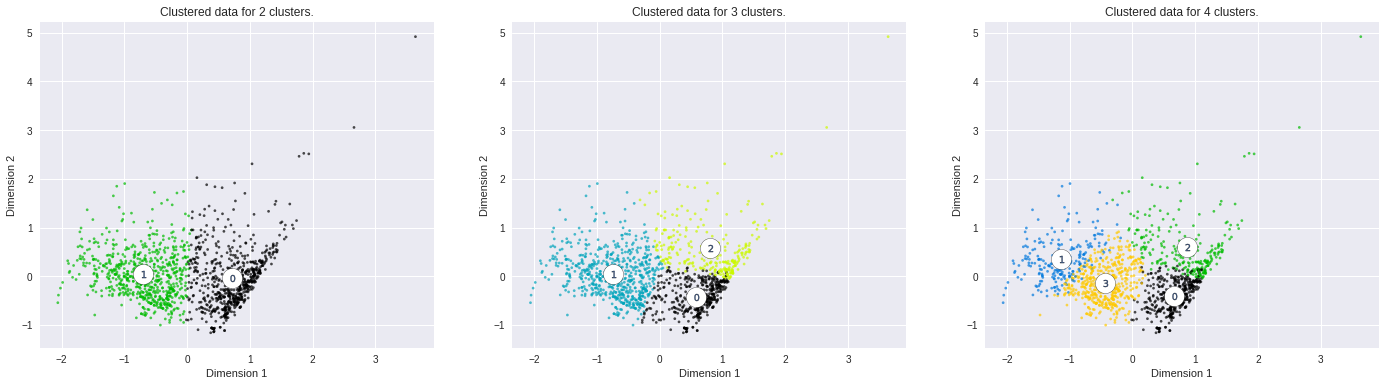

In [17]:
gelman_pca_clusters = vs.Clusters(df_gelman_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()

### Clustering using PCA with Standard scaling

 33%|███▎      | 1/3 [00:01<00:03,  1.97s/it]

For n_clusters = 2 the silhouette score is 0.3672624688128419.


 67%|██████▋   | 2/3 [00:05<00:02,  2.64s/it]

For n_clusters = 3 the silhouette score is 0.29227979521847186.


100%|██████████| 3/3 [00:08<00:00,  2.87s/it]

For n_clusters = 4 the silhouette score is 0.24540601313595659.


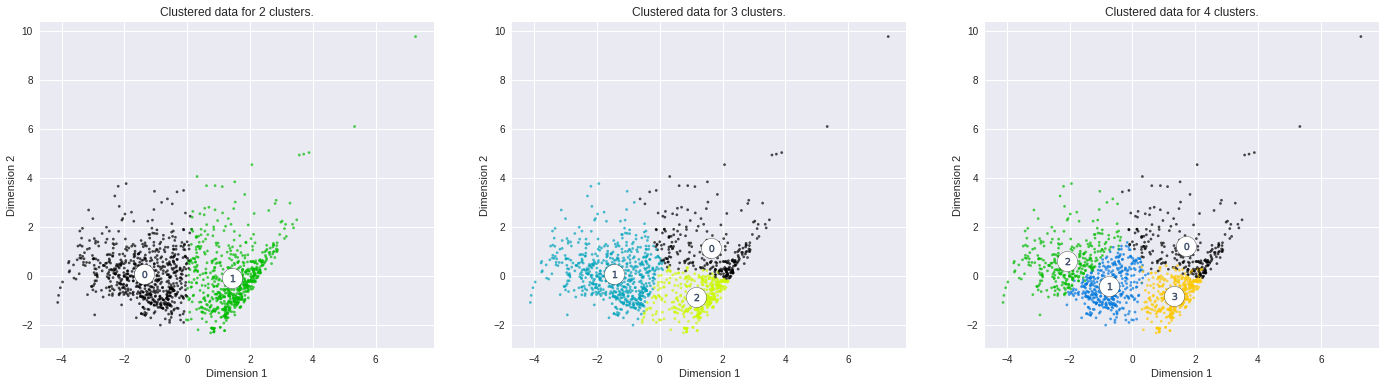

In [18]:
standard_pca_clusters = vs.Clusters(df_standard_pca, [2,3,4])
standard_pca_clusters.cluster_plots()